In [1]:
using Distributions, TimeIt, ProgressMeter, PyPlot, CSV
include("zz_structures_DuLuSuSe.jl")
include("mbsampler.jl")

get_clustering (generic function with 1 method)

In [2]:
m = CSV.read("gastroenterology.txt", header=false)
convert(Array,m[2,:]);

In [3]:
x = zeros(size(m,1)-3,size(m,2))
for i in 4:size(m,1) 
    for j in 1:size(m,2)
        x[i-3,j] = parse(Float64, m[i,j])
    end
end
x = x[vec(sum(abs.(x),2) .!= 0),:]

X = zeros(size(x,1),size(x,2))
mu, sd = vec(mean(x,2)), vec(std(x,2))
for i in 1:size(x,2)
    X[:,i] = (x[:,i]-mu)./sd
end

y = zeros(size(m,2))
for j in 1:size(m,2) 
    label = parse(Int64, m[2,j])
    y[j] = (label>1)
end

In [4]:
d, Nobs = size(X)
σ02 = 1;

In [5]:
prior = SS_prior(d, σ02);
my_ll = ll_logistic(X,y)
my_model = model(my_ll, prior);

In [6]:
ξ0 = zeros(d)
stepsize = 3e-2
n_leapfrog = 20
T = 5000

xi_samples, hyper_samples, acc = GibbsHMC(my_model, ξ0, stepsize, n_leapfrog, T);

10 percent steps in 95.4 min; HMC acceptance = 91 percent 
20 percent steps in 182.2 min; HMC acceptance = 93 percent 
30 percent steps in 252.0 min; HMC acceptance = 93 percent 
40 percent steps in 316.5 min; HMC acceptance = 94 percent 
50 percent steps in 381.3 min; HMC acceptance = 94 percent 
60 percent steps in 446.1 min; HMC acceptance = 94 percent 
70 percent steps in 510.1 min; HMC acceptance = 95 percent 
80 percent steps in 576.4 min; HMC acceptance = 95 percent 
90 percent steps in 642.4 min; HMC acceptance = 94 percent 
100 percent steps in 709.0 min; HMC acceptance = 94 percent 


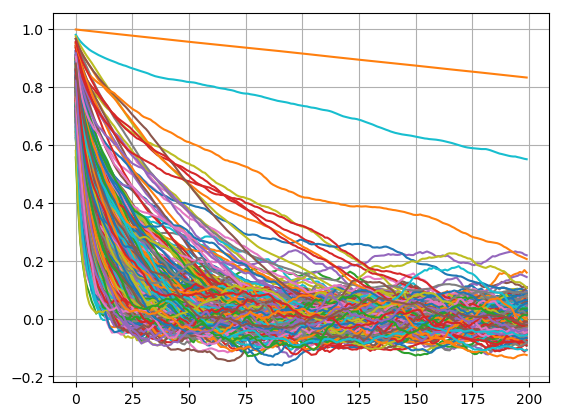

In [7]:
for i in 1:size(xi_samples,1) 
    plot(acf(xi_samples[i,:], 200))
end
grid(true)

In [13]:
print(mean(abs.(size(xi_samples,2)./[sum(acf(xi_samples[i,:], 100)) for i in 1:size(xi_samples,1)])), "\n")
print(mean(abs.(size(xi_samples,2)./[sum(acf(xi_samples[i,:], 200)) for i in 1:size(xi_samples,1)])), "\n")
print(mean(abs.(size(xi_samples,2)./[sum(acf(xi_samples[i,:], 300)) for i in 1:size(xi_samples,1)])), "\n")
print(mean(abs.(size(xi_samples,2)./[sum(acf(xi_samples[i,:], 400)) for i in 1:size(xi_samples,1)])), "\n")
print(mean(abs.(size(xi_samples,2)./[sum(acf(xi_samples[i,:], 500)) for i in 1:size(xi_samples,1)])), "\n")

820.9211074384693
944.7607735035322
1624.1268475730226
2082.6144765052986
3646.3143166899663
